In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

In [3]:
# File to Load
mouse_drug_data = "data/mouse_drug_data.csv"
clinical_trial_data = "data/clinicaltrial_data.csv"

In [4]:
# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data_df = pd.read_csv(mouse_drug_data)
clinical_trial_data_df = pd.read_csv(clinical_trial_data)

In [5]:
# Combine the data into a single dataset
dataset_df = pd.merge(mouse_drug_data_df, clinical_trial_data_df, on="Mouse ID")

In [6]:
# Display the data table for preview
dataset_df

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2
...,...,...,...,...,...
1901,j235,Placebo,0,45.000000,0
1902,j235,Placebo,5,46.588820,0
1903,j235,Placebo,10,48.018788,1
1904,j235,Placebo,15,51.161138,1


In [7]:
# === Tumor Response to Treatment ===
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
grouped_dataset = dataset_df.groupby(['Drug','Timepoint'])

In [8]:
# Convert to DataFrame
tumor_response_df = pd.DataFrame(grouped_dataset['Tumor Volume (mm3)'].mean())
tumor_response_reset_df = tumor_response_df.reset_index()

In [63]:
# Preview DataFrame
tumor_response_reset_df

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


In [10]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_volumes_sem_df = pd.DataFrame(grouped_dataset['Tumor Volume (mm3)'].sem())
tumor_volumes_sem_df

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731
...                                 ...
Zoniferol 25                   0.602513
          30                   0.800043
          35                   0.881426
          40                   0.998515
          45                   1.003576

[100 rows x 1 columns]

In [11]:
# Convert to DataFrame
tumor_volumes_sem_df = pd.DataFrame(grouped_dataset['Tumor Volume (mm3)'].sem())

In [12]:
# Preview DataFrame
# DEBUG See sample output 
tumor_volumes_sem_reset_df = tumor_volumes_sem_df.reset_index()
tumor_volumes_sem_reset_df

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
...,...,...,...
95,Zoniferol,25,0.602513
96,Zoniferol,30,0.800043
97,Zoniferol,35,0.881426
98,Zoniferol,40,0.998515


In [13]:
# Minor Data Munging to Re-Format the Data Frames
tumor_response_pivot_df = tumor_response_reset_df.pivot_table('Tumor Volume (mm3)', ['Timepoint'], 'Drug')

In [14]:
# Preview that Reformatting worked
# DEBUG See sample output  
tumor_response_pivot_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [98]:
days = tumor_response_pivot_df.index.tolist()
#DEBUG 
days

[0, 5, 10, 15, 20, 25, 30, 35, 40, 45]

In [100]:
#tumor_response_pivot_temp_df = tumor_response_pivot_df.set_index("Capomulin")
capomulin_val = tumor_response_pivot_df["Capomulin"].tolist()
infubinol_val = tumor_response_pivot_df["Infubinol"].tolist()
ketapril_val = tumor_response_pivot_df["Ketapril"].tolist()
placebo_val = tumor_response_pivot_df["Placebo"].tolist()
#DEBUG capomulin_val


In [101]:
# Get DataFrame with Standard Errors
#tumor_volumes_pivot_df = tumor_volumes_sem_reset_df.pivot_table('Tumor Volume (mm3)', ['Timepoint'], 'Drug')
#tumor_volumes_pivot_df
capomulin_err = tumor_volumes_pivot_df["Capomulin"].tolist()
infubinol_err = tumor_volumes_pivot_df["Infubinol"].tolist()
ketapril_err = tumor_volumes_pivot_df["Ketapril"].tolist()
placebo_err = tumor_volumes_pivot_df["Placebo"].tolist()
#DEBUG capomulin_err


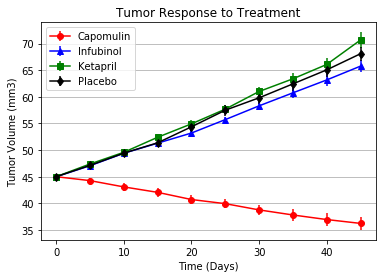

In [118]:
# Generate the Plot (with Error Bars)
#capomulin = plt.errorbar(days, capomulin_val, capomulin_err, marker='o', color="red", label="Capomulin")
#infubinol = plt.errorbar(days, infubinol_val, infubinol_err, marker='^', color="blue", label="Infubinol")
#ketapril = plt.errorbar(days, ketapril_val, ketapril_err, marker='s', color="green", label="Ketapril")
#placebo = plt.errorbar(days, placebo_val, placebo_err, marker='d', color="black", label="Placebo") 
#plt.title("Tumor Response to Treatment")
#plt.xlabel("Time (Days)")
#plt.ylabel("Tumor Volume (mm3)")
#plt.grid(axis='y')

# Create a legend for our chart
#plt.legend(handles=[capomulin, infubinol, ketapril, placebo], loc="best")

# Generate the Plot (with Error Bars)
fig, ax = plt.subplots()

capomulin = ax.errorbar(days, capomulin_val, capomulin_err, marker='o', color="red", label="Capomulin")
infubinol = ax.errorbar(days, infubinol_val, infubinol_err, marker='^', color="blue", label="Infubinol")
ketapril = ax.errorbar(days, ketapril_val, ketapril_err, marker='s', color="green", label="Ketapril")
placebo = ax.errorbar(days, placebo_val, placebo_err, marker='d', color="black", label="Placebo") 
ax.set_title("Tumor Response to Treatment")
ax.set_xlabel("Time (Days)")
ax.set_ylabel("Tumor Volume (mm3)")
ax.grid(axis='y')

# Create a legend for our chart
plt.legend(handles=[capomulin, infubinol, ketapril, placebo], loc="best")



In [120]:
# Save the Figure
fig.savefig("Tumor_Response_to_Treatment.jpg")

In [121]:
# Show the Figure
plt.show()


In [ ]:
# === Metastatic Response to Treatment ===
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 


In [ ]:
# Convert to DataFrame


In [ ]:
# Preview DataFrame
# DEBUG See sample output 


In [ ]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 


In [ ]:
# Convert to DataFrame


In [ ]:
# Preview DataFrame
# DEBUG See sample output 


In [ ]:
# Minor Data Munging to Re-Format the Data Frames


In [ ]:
# Preview that Reformatting worked
# DEBUG See sample output 


In [ ]:
# Generate the Plot (with Error Bars)


In [ ]:
# Save the Figure


In [ ]:
# Show the Figure


In [ ]:
# === Survival Rates ===
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)


In [ ]:
# Convert to DataFrame


In [ ]:
# Preview DataFrame
# DEBUG See sample output 


In [ ]:
# Minor Data Munging to Re-Format the Data Frames



In [ ]:
# Preview DataFrame
# DEBUG See sample output


In [ ]:
# Generate the Plot (Accounting for percentages)



In [ ]:
# Save the Figure


In [ ]:
# Show the Figure
plt.show()


In [ ]:
# === Summary Bar Graph ===
# Calculate the percent changes for each drug


In [ ]:
# Display the data to confirm
# DEBUG See sample output


In [ ]:
# Store all Relevant Percent Changes into a Tuple



In [ ]:
# Splice the data between passing and failing drugs


In [ ]:
# Orient widths. Add labels, tick marks, etc. 


In [ ]:
# Use functions to label the percentages of changes



In [ ]:
# Call functions to implement the function calls


In [ ]:
# Save the Figure


In [ ]:
# Show the Figure
fig.show()